<h2 style="color: #000000; font-weight: bold;"> Fake News Project  Classification and NLP </h2>


<h3 style="color: #000000; font-weight: bold;"> ETL</h3>

In [1]:
# 📚 Basic Libraries
import pandas as pd
import warnings

# 📝 Text Processing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In [2]:
def load_data(file_path):
    try:

        data = pd.read_csv(file_path, sep="\t")
        print(f"Data loaded successfully from {file_path}")
        data_copy = data.copy()
        return data_copy
    except FileNotFoundError:
        print(f"Error: The file {file_path} was not found.")
        return None
    
def preprocess_data(data):
        data = data.replace("[^a-zA-Z]", " ", regex=True)
        data.columns = [column.lower().replace(' ', '_') for column in data.columns]
        data.columns = [str(i) for i in range(data.shape[1])]
        return data
    
def create_headlines_list(data):
    headlines = []
    for row in range(0, len(data)):
        # Joining the words in each row to form a headline
        headlines.append(' '.join(str(x) for x in data.iloc[row, :]))
    return headlines



In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 
warnings.filterwarnings('ignore')  

file_path = 'training_data.csv'
training_data = load_data(file_path)
training_data = preprocess_data(training_data)
training_data = training_data.rename(columns={'0': 'label'})
training_data.head()

Data loaded successfully from training_data.csv


,label,1
0,0,drunk bragging trump staffer started russian c...
1,0,sheriff david clarke becomes an internet joke ...
2,0,trump is so obsessed he even has obama s name ...
3,0,pope francis just called out donald trump duri...
4,0,racist alabama cops brutalize black boy while ...


In [4]:
training_data_headlines = create_headlines_list(training_data)

In [5]:
ground_truth = training_data['label']

In [6]:
# Text Vectorization: Converting Words to Numbers Using scikit-learn
countvector = CountVectorizer(ngram_range=(2,2))
train_dataset = countvector.fit_transform(training_data_headlines)
ground_truth = training_data['label']

<h3 style="color: #000000; font-weight: bold;"> Test Train-Split</h3>

In [7]:
X_train, X_test, y_train, y_test = train_test_split(train_dataset, ground_truth, test_size=0.3, random_state=42)

In [11]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

# Evaluation

<h3 style="color: #000000; font-weight: bold;"> Cross Validation</h3>

In [ ]:
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5, n_jobs=-1) # only needs for Grid Search and hyper parameters tuning, validation set(optimzation) final unseen data
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average Cross-Validation Accuracy: {cv_scores.mean()}")

Cross-Validation Scores: [0.88788956 0.89521021 0.89374608 0.89228195 0.8876804 ]
Average Cross-Validation Accuracy: 0.8913616398243045


<h3 style="color: #000000; font-weight: bold;"> Predictions</h3>

In [10]:
predictions = svm_model.predict(X_test)
from sklearn.metrics import accuracy_score
print("Test Set Accuracy:", accuracy_score(y_test, predictions))

Test Set Accuracy: 0.8972281866094085


In [12]:
predictions_df = pd.DataFrame(predictions, columns=['predictions'])
predictions_df['predictions'] = predictions_df['predictions'].astype(int)
training_data = pd.concat([training_data, predictions_df], axis=1)
training_data.head()

,label,1,predictions
0,0,drunk bragging trump staffer started russian c...,1.0
1,0,sheriff david clarke becomes an internet joke ...,0.0
2,0,trump is so obsessed he even has obama s name ...,0.0
3,0,pope francis just called out donald trump duri...,1.0
4,0,racist alabama cops brutalize black boy while ...,0.0


In [13]:
# Step 1: Convert predictions into a DataFrame
predictions_df = pd.DataFrame(predictions, columns=['predictions'])
predictions_df['predictions'] = predictions_df['predictions'].astype(int)
training_data = pd.concat([training_data, predictions_df], axis=1)


<h3 style="color: #000000; font-weight: bold;"> Confusion Matrix</h3>

Confusion Matrix:
[[4633  644]
 [ 409 4560]]


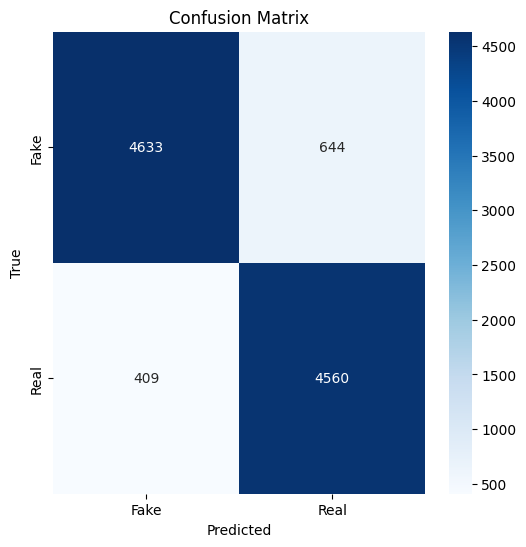

In [14]:
cm = confusion_matrix(y_test, predictions)

# confusion matrix
print("Confusion Matrix:")
print(cm)

# confusion matrix using a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Classification Report Metrics

In [15]:
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print(f'Accuracy: {accuracy}')
print()
print("SVM Classification Report")
print(report)

Accuracy: 0.8972281866094085

SVM Classification Report
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      5277
           1       0.88      0.92      0.90      4969

    accuracy                           0.90     10246
   macro avg       0.90      0.90      0.90     10246
weighted avg       0.90      0.90      0.90     10246



## Second Model - NB

In [15]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(2, 2))  # Using bigrams
train_dataset = tfidf_vectorizer.fit_transform(training_data_headlines)
ground_truth = training_data['label']

<h3 style="color: #000000; font-weight: bold;"> Test Train-Split</h3>

In [16]:
X_train, X_test, y_train, y_test = train_test_split(train_dataset, ground_truth, test_size=0.3, random_state=42)

In [17]:
# Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

# Evaluation

<h3 style="color: #000000; font-weight: bold;"> Predictions</h3>

In [18]:
# Predictions and Evaluation
predictions = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
print()
print(" Naive Bayes Classification Report")
print(f"{classification_report(y_test, predictions)}")

Accuracy: 0.9144056217060316

 Naive Bayes Classification Report
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      5277
           1       0.93      0.89      0.91      4969

    accuracy                           0.91     10246
   macro avg       0.92      0.91      0.91     10246
weighted avg       0.91      0.91      0.91     10246



<h3 style="color: #000000; font-weight: bold;"> Confusion Matrix</h3>

In [19]:
# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
print(f"Confusion Matrix:\n{cm}")

Confusion Matrix:
[[4928  349]
 [ 528 4441]]


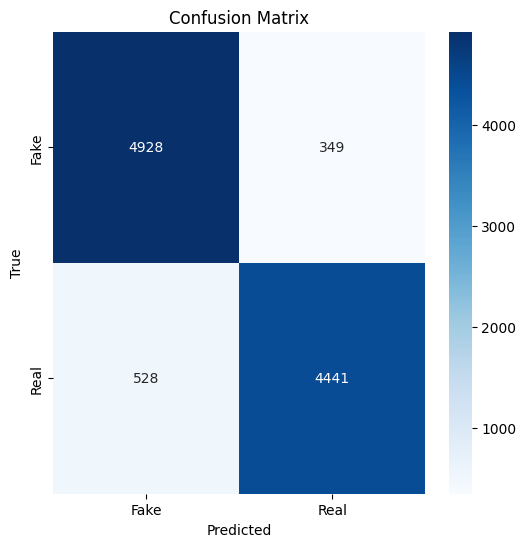

In [20]:
# Plot Confusion Matrix using a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

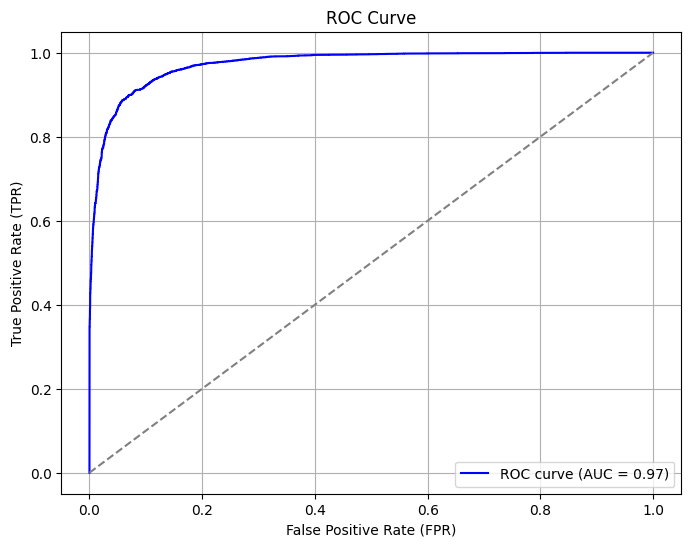

AUC: 0.97


In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc 

# Get predicted probabilities for class 1
y_prob = nb_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Print AUC
print(f"AUC: {roc_auc:.2f}")
